In [120]:
import numpy as np
from math import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [121]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

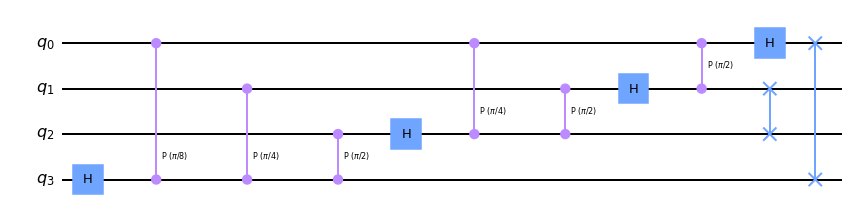

In [122]:
# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output='mpl')

In [123]:
bin(5)

'0b101'

In [124]:
# Create the circuit
qc = QuantumCircuit(3)

# Constants
n=3
number=3

# Encode the state
for qubit in range(n): qc.h(qubit)

qc.p(number*pi/4, 0)
qc.p(number*pi/2, 1)
qc.p(number*pi, 2)
qc.draw(output='mpl')

In [125]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()

qc_init.save_statevector()
result = sim.run(qc_init).result()

display(plot_histogram(result.get_counts()))
display(plot_bloch_multivector(result.get_statevector()))

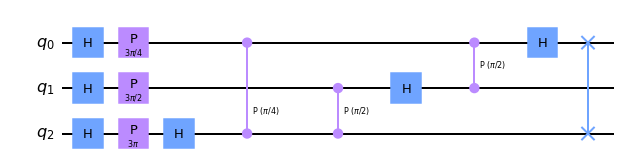

In [126]:
qft(qc,3)
qc.draw(output='mpl')

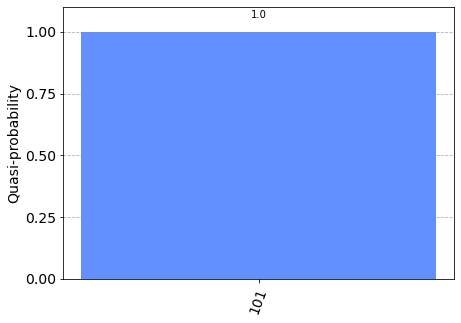

In [127]:
qc.save_statevector()
result = sim.run(qc).result()

display(plot_histogram(result.get_counts()))
# display(plot_bloch_multivector(result.get_statevector()))